In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## Data pipeline fuel dataset

For the fuel prices analysis (subquestion 1), the following dataset is used:
**brandstofprijzen.csv**

### Formatting data

**1)** The data is imported using pandas.

**2)** The index column is set to 'Perioden', the column with the days.

**3)** The data is filtered, only the years 2010 to 2017 are relevant.


Now that the dataset is imported and the irrelevant years are filtered out, the data is further processed.


### Processing data

**1)** Resample the DataFrame to years and months. We are interested in yearly and monthly average fuel prices.

**2)** Seperate the fuel types Benzine and Diesel. Since LPG is hardly used anymore, this fuel type is not analyzed further. We now obtained a monthly and yearly set of the average fuel price for both Benzine and Diesel.

**3)** Use the Benzine and Diesel prices to calculate an average fuel priced, which is used for this analyses and compared to both Benzine and Diesel.




In [20]:
# import the data
prijzen = pd.read_csv('brandstofprijzen.csv', delimiter = ';', index_col = 'Perioden', parse_dates = ['Perioden'])

In [21]:
# resample the data to yearly average
prijsjaar = prijzen.resample('YE', kind = 'period').mean()

# resample the data to monthly average
prijsmaand = prijzen.resample('ME', kind = 'period').mean()

C:\Users\luket\AppData\Local\Temp\ipykernel_16664\1401364278.py:2: FutureWarning:

The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead

C:\Users\luket\AppData\Local\Temp\ipykernel_16664\1401364278.py:5: FutureWarning:

The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead



In [22]:
# filter the monthly average to 2010-2017
prijsmaand1017 = prijsmaand.loc['2010':'2017']

# filter the yearly average to 2010-2017
prijsjaar1017 = prijsjaar.loc['2010':'2017']

display(prijsmaand1017)

,ID,BenzineEuro95_1,Diesel_2,Lpg_3
Perioden,,,,
2010-01,1476.0,1.444581,1.098032,0.627839
2010-02,1505.5,1.452107,1.097071,0.653214
2010-03,1535.0,1.505710,1.139484,0.649516
2010-04,1565.5,1.531400,1.182167,0.630433
2010-05,1596.0,1.524226,1.189226,0.621677
...,...,...,...,...
2017-08,4245.0,1.529935,1.191258,0.585903
2017-09,4275.5,1.560033,1.221000,0.623233
2017-10,4306.0,1.532645,1.237097,0.651613


In [23]:
# seperate the fuel type Benzine
benzinejaar1017 = prijsjaar.loc['2010':'2017', 'BenzineEuro95_1']
benzinemaand1017 = prijsmaand.loc['2010':'2017', 'BenzineEuro95_1']

# seperate the fuel type Diesel
dieseljaar1017 = prijsjaar.loc['2010':'2017', 'Diesel_2']
dieselmaand1017 = prijsmaand.loc['2010':'2017', 'Diesel_2']  

# calculate the average price
gemmaand1017 = (benzinemaand1017 + dieselmaand1017) / 2
gemjaar1017 =  (benzinejaar1017 + dieseljaar1017) / 2

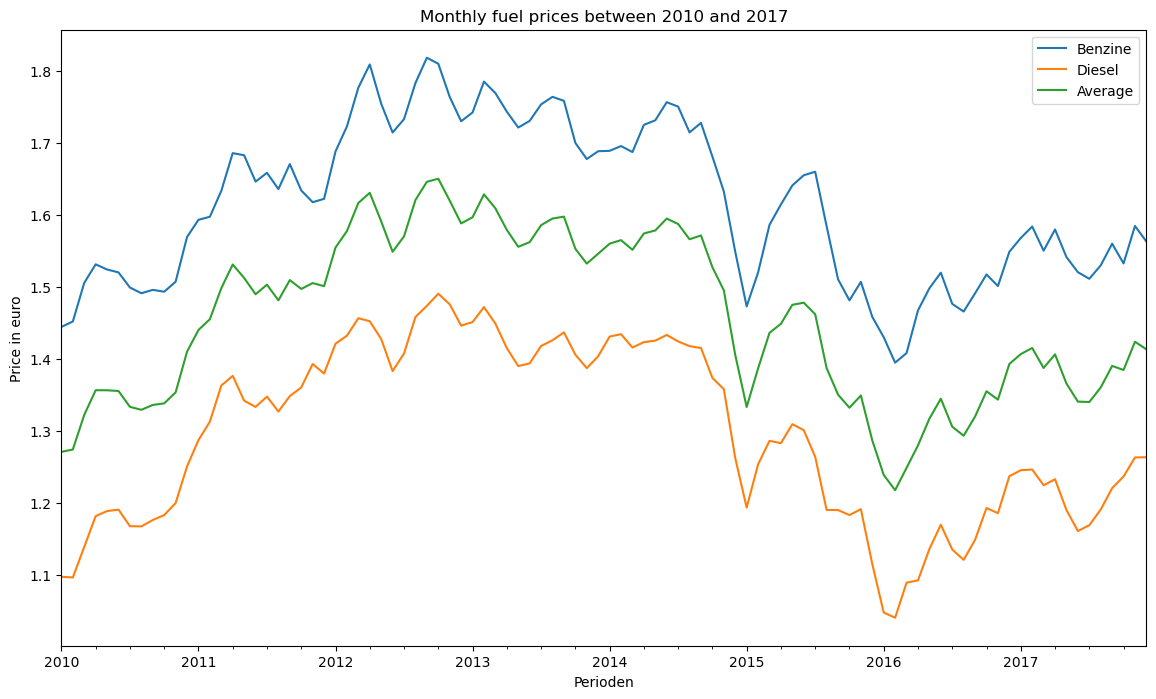

In [24]:
# create a new figure
plt.figure(figsize = (14,8))

# plot the monthly prices for Benzine, Diesel and average
benzinemaand1017.plot(label = 'Benzine')
dieselmaand1017.plot(label = 'Diesel')
gemmaand1017.plot(label = 'Average')

# add the legend and axis lable
plt.legend()
plt.ylabel('Price in euro')

# add the title
plt.title('Monthly fuel prices between 2010 and 2017');

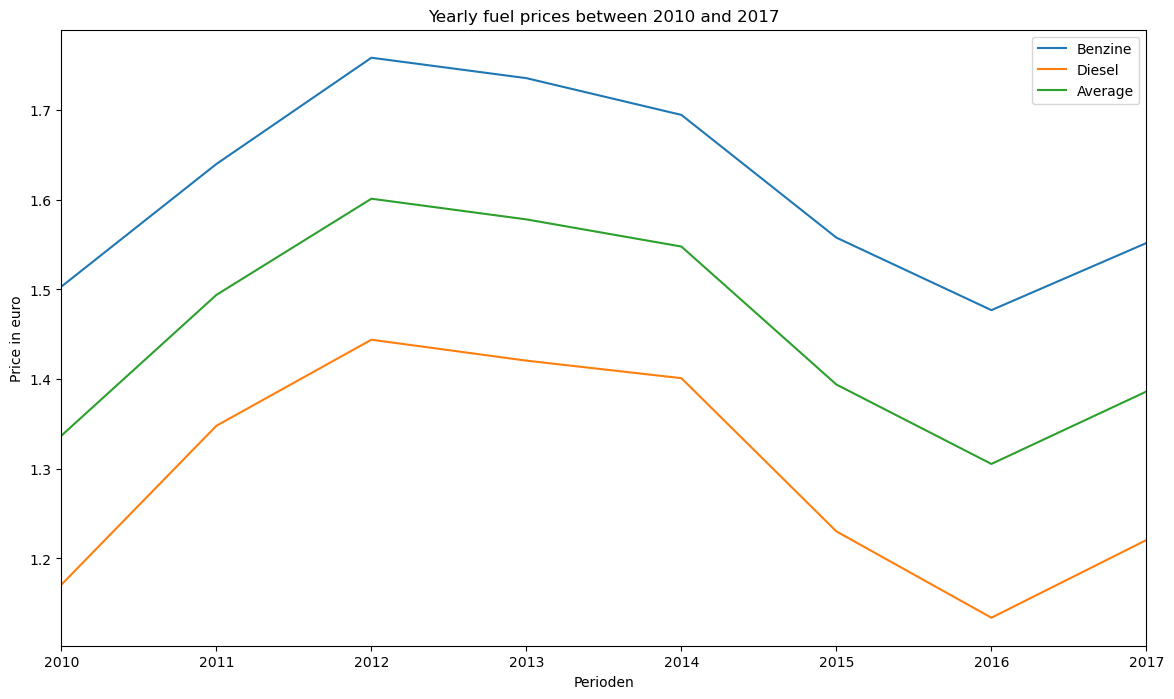

In [31]:
# create a new figure
plt.figure(figsize = (14,8))

# plot the yearly prices for Benzine, Diesel and average
benzinejaar1017.plot(label = 'Benzine')
dieseljaar1017.plot(label = 'Diesel')
gemjaar1017.plot(label = 'Average')

# add the legend and axis lable
plt.legend()
plt.ylabel('Price in euro')

# add the title
plt.title('Yearly fuel prices between 2010 and 2017');